In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
IMAGE_SIZE = 255
CHANNEL = 3

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)



train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
    save_to_dir = "AugmentedImages"

)


Found 1506 images belonging to 3 classes.


In [12]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 255, 255, 3)


In [14]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [16]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [18]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=10,
)

Epoch 1/10
47/47 [==============================] - 312s 7s/step - loss: 0.9314 - accuracy: 0.4715 - val_loss: 0.9139 - val_accuracy: 0.4479
Epoch 2/10
47/47 [==============================] - 195s 4s/step - loss: 0.8465 - accuracy: 0.5563 - val_loss: 0.6378 - val_accuracy: 0.7760
Epoch 3/10
47/47 [==============================] - 214s 5s/step - loss: 0.6160 - accuracy: 0.7307 - val_loss: 0.4093 - val_accuracy: 0.8229
Epoch 4/10
47/47 [==============================] - 308s 7s/step - loss: 0.3897 - accuracy: 0.8507 - val_loss: 0.3816 - val_accuracy: 0.8073
Epoch 5/10
47/47 [==============================] - 293s 6s/step - loss: 0.3017 - accuracy: 0.8772 - val_loss: 0.2672 - val_accuracy: 0.8854
Epoch 6/10
47/47 [==============================] - 313s 7s/step - loss: 0.2319 - accuracy: 0.9145 - val_loss: 0.1900 - val_accuracy: 0.9115
Epoch 7/10
47/47 [==============================] - 229s 5s/step - loss: 0.2245 - accuracy: 0.9166 - val_loss: 0.3240 - val_accuracy: 0.8646
Epoch 8/10
47

In [22]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 43s 3s/step - loss: 0.1864 - accuracy: 0.9258


In [23]:
scores

[0.18641310930252075, 0.9257540702819824]

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 47}

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
type(history.history['loss'])

list

In [28]:
len(history.history['loss'])

10

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9314262270927429,
 0.8465476632118225,
 0.6160215139389038,
 0.38966596126556396,
 0.30173131823539734]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
val_acc

[0.4479166567325592,
 0.7760416865348816,
 0.8229166865348816,
 0.8072916865348816,
 0.8854166865348816,
 0.9114583134651184,
 0.8645833134651184,
 0.9166666865348816,
 0.96875,
 0.9479166865348816]

In [32]:
acc

[0.47150611877441406,
 0.5563093423843384,
 0.730664849281311,
 0.8507462739944458,
 0.8772048950195312,
 0.9145182967185974,
 0.9165536165237427,
 0.9131614565849304,
 0.9369063973426819,
 0.9416553378105164]

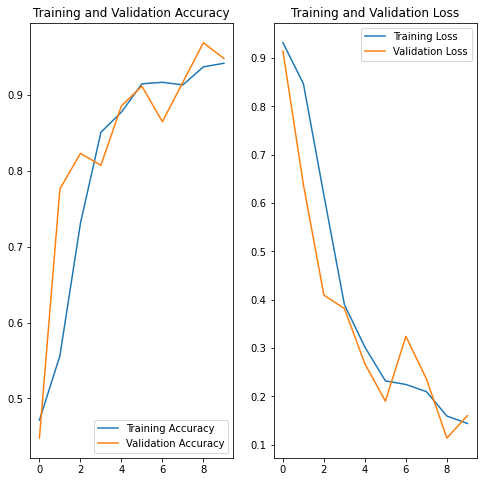

In [33]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.53381354 0.4828331  0.5181272 ]
  [0.5061338  0.4551534  0.49044752]
  [0.60666966 0.5556893  0.5909834 ]
  ...
  [0.5340894  0.48310897 0.5223247 ]
  [0.5335221  0.48254174 0.5217574 ]
  [0.53416455 0.4831841  0.52239984]]

 [[0.53723943 0.48625904 0.52155316]
  [0.4988537  0.44787332 0.48316744]
  [0.60945326 0.5584729  0.593767  ]
  ...
  [0.5446269  0.49364653 0.5328622 ]
  [0.54515517 0.49417475 0.53339046]
  [0.54536927 0.49438888 0.53360456]]

 [[0.5406654  0.48968497 0.5249791 ]
  [0.4915736  0.44059318 0.4758873 ]
  [0.6122368  0.5612564  0.5965505 ]
  ...
  [0.54885674 0.49787635 0.53709203]
  [0.5491733  0.4981929  0.5374086 ]
  [0.54981565 0.49883527 0.53805095]]

 ...

 [[0.62028974 0.56930935 0.635976  ]
  [0.62007564 0.56909525 0.6357619 ]
  [0.61986154 0.56888115 0.6355478 ]
  ...
  [0.56078434 0.50980395 0.54901963]
  [0.56280935 0.51182896 0.55104464]
  [0.608169   0.5571886  0.5964043 ]]

 [[0.59373724 0.54275686 0.6094235 ]
  [0.5920242  0.5410438  0.60771054]


first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


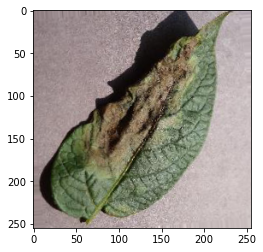

In [41]:
class_name = list(train_generator.class_indices.keys())


import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

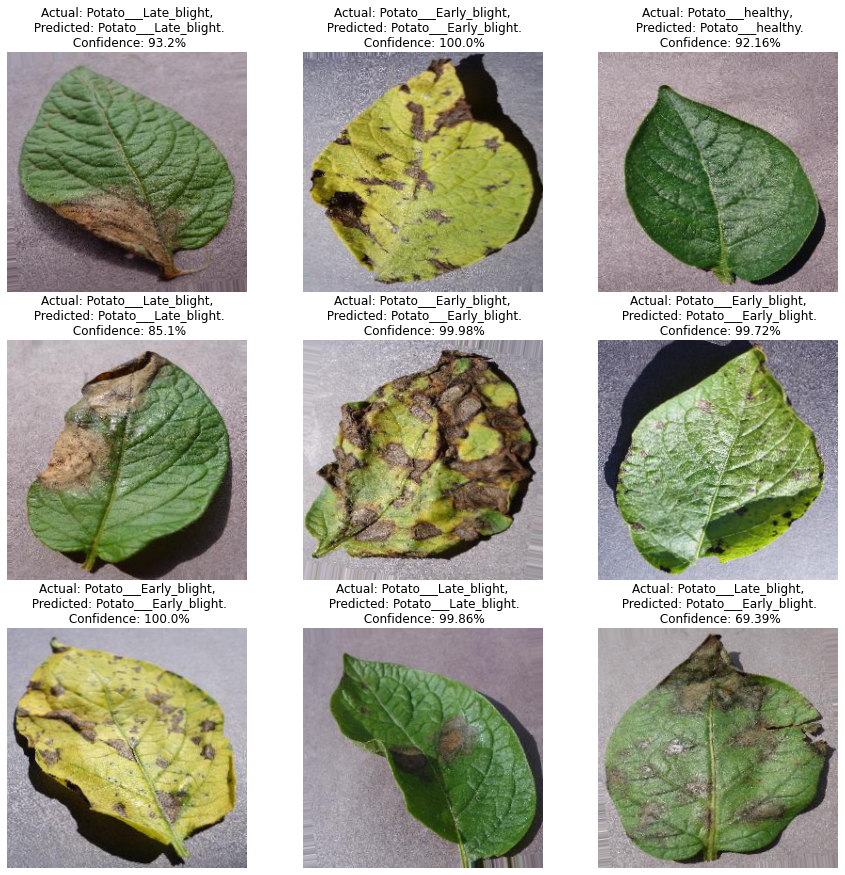

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break


In [44]:
model.save("../potatoes.h5")